![VAR](https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-94-017-8642-3_2/MediaObjects/316588_1_En_2_Fig14_HTML.gif)

_____

# ICA: Forecasting 
_____

## Group Member Names:
- Brandon Webster
- Derek Bowman
- Shang-Huan Chiang
- Nandan Hegde
- Rohit Nallari
- Bibin Varghese

Once again there are odd and even groups. The first to arrive today is Group 1, and progresses to 2 to the next group that arrives. Figure out which group you are based on this numbering scheme we have been using this semester. 

Your group's first task is to use the white boards. As a group, write out the equations you need to solve for AR($p$). That is, show very clearly how you go from a dataset to the equations that you need to solve. Show and discuss the solution to these equations. Once you have that solution, write out how to think about and implement one-step ahead. 

Be absolutely sure that everyone in your group understands these steps. Quiz each other. Write out the Python using `linalg`. Be sure to account for any constants (i.e., bias). 

Once you have the equations written out, discuss how you would generalize them to:
* VAR($p$),
* testing for causality.

Take a picture to include with this notebook.

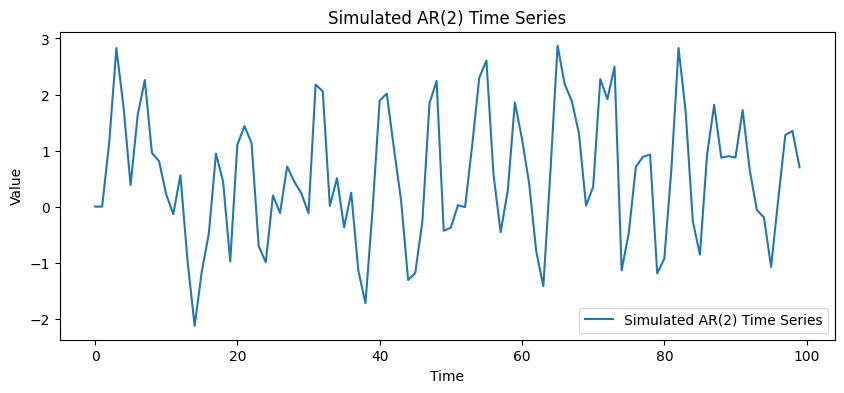

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the AR(2) model
phi_0 = 0.5    # Intercept
phi_1 = 0.7    # Coefficient for y_{t-1}
phi_2 = -0.4   # Coefficient for y_{t-2}
sigma = 1.0    # Standard deviation of the error term
T = 100        # Number of observations

# Initialize the time series
y = np.zeros(T)

# Generate error terms
epsilon = np.random.normal(0, sigma, T)

# Generate the time series data
for t in range(2, T):
    y[t] = phi_0 + phi_1 * y[t-1] + phi_2 * y[t-2] + epsilon[t]

# Plot the generated time series
plt.figure(figsize=(10, 4))
plt.plot(y, label='Simulated AR(2) Time Series')
plt.title('Simulated AR(2) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [3]:
p = 2  # Order of the AR model
N = T - p  # Number of usable observations after accounting for lags

# Response vector Y (from y_{p} to y_{T-1})
Y = y[p:]

# Design matrix X
X = np.ones((N, p + 1))  # +1 for the intercept term

# Fill in the lagged values
for i in range(1, p + 1):
    X[:, i] = y[p - i:T - i]

In [4]:
# Estimate coefficients using the OLS formula
Phi_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

# Display the estimated coefficients
print("Estimated coefficients:")
print(f"Intercept (phi_0): {Phi_hat[0]}")
for i in range(1, p + 1):
    print(f"phi_{i}: {Phi_hat[i]}")

Estimated coefficients:
Intercept (phi_0): 0.4431189359759092
phi_1: 0.6728564432979495
phi_2: -0.46955359446706135


In [5]:
# Get the last p observed values for forecasting
last_p_values = y[-p:][::-1]  # Reverse to match the order of coefficients

# Compute the forecast
y_next = Phi_hat[0] + np.dot(Phi_hat[1:], last_p_values)

print(f"\nOne-step ahead forecast: {y_next}")


One-step ahead forecast: 0.2802016555356588


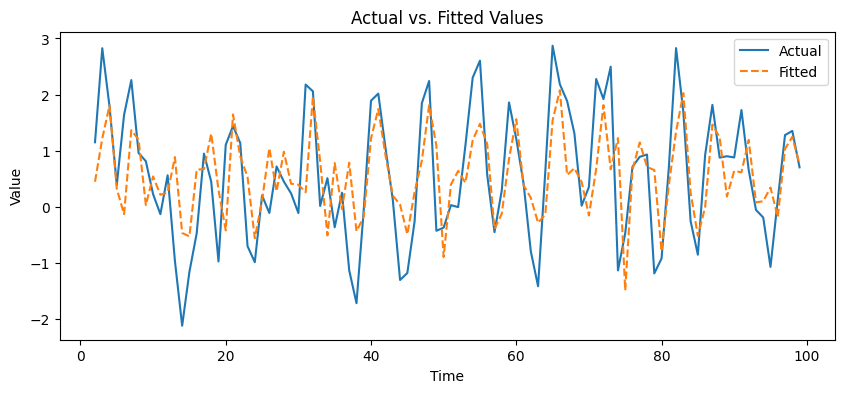

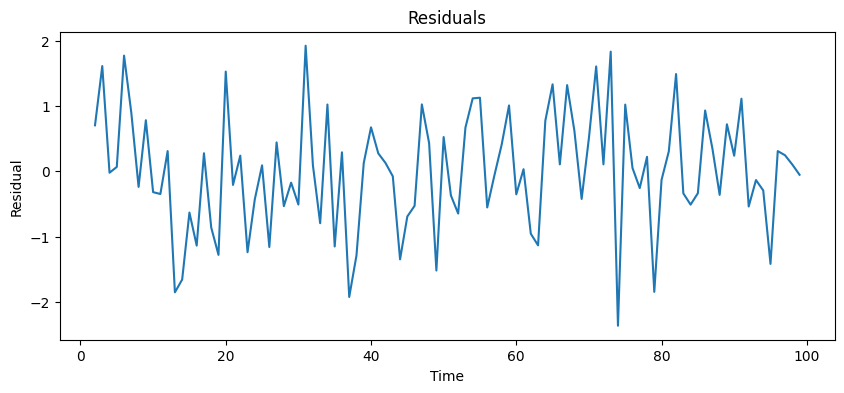

In [6]:
# Calculate fitted values
Y_pred = X @ Phi_hat

# Calculate residuals
residuals = Y - Y_pred

# Plot actual vs. fitted values
plt.figure(figsize=(10, 4))
plt.plot(range(p, T), Y, label='Actual')
plt.plot(range(p, T), Y_pred, label='Fitted', linestyle='--')
plt.title('Actual vs. Fitted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(range(p, T), residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

In [7]:
## Generating Sample Data for VAR(1) Model

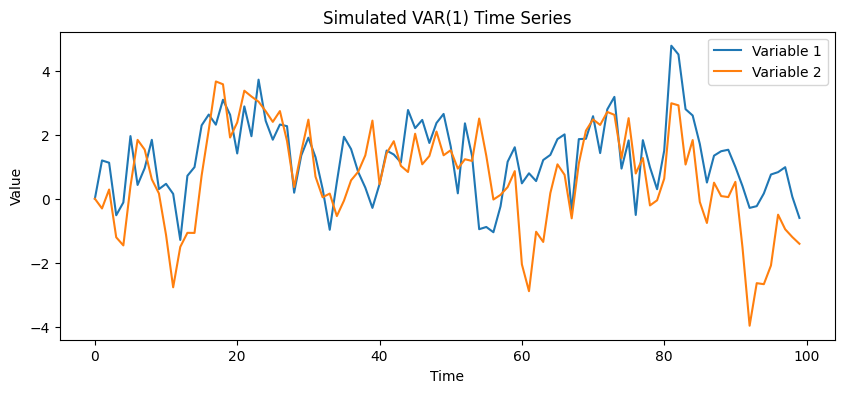

In [8]:
# Parameters for the VAR(1) model
c = np.array([0.5, -0.2])  # Intercept vector
Phi = np.array([[0.6, 0.1],  # Coefficient matrix
                [0.3, 0.7]])
sigma = np.array([[1.0, 0.5],  # Covariance matrix of the error terms
                  [0.5, 1.0]])
T = 100  # Number of observations
k = 2    # Number of variables

# Generate error terms with specified covariance
mean = [0, 0]
epsilon = np.random.multivariate_normal(mean, sigma, T)

# Initialize the time series
Y = np.zeros((T, k))

# Generate the time series data
for t in range(1, T):
    Y[t] = c + Phi @ Y[t-1] + epsilon[t]

# Plot the generated time series
plt.figure(figsize=(10, 4))
plt.plot(Y[:, 0], label='Variable 1')
plt.plot(Y[:, 1], label='Variable 2')
plt.title('Simulated VAR(1) Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
p = 1  # Order of the VAR model
N = T - p  # Number of usable observations after accounting for lags

# Response matrix Y (from Y_{p} to Y_{T-1})
Y_response = Y[p:]

# Design matrix X
X = np.ones((N, k * p + 1))  # +1 for the intercept term

# Fill in the lagged values
for i in range(p):
    X[:, (k * i + 1):(k * (i + 1) + 1)] = Y[p - i - 1:T - i - 1]

In [10]:
### Equation for Variable 1

In [11]:
# Variable 1
Y_var1 = Y_response[:, 0]  # Response variable

# Design matrix remains the same
Phi_hat_var1 = np.linalg.lstsq(X, Y_var1, rcond=None)[0]

print("Estimated coefficients for Variable 1:")
print(f"Intercept: {Phi_hat_var1[0]}")
for i in range(k * p):
    print(f"Phi_{i+1}: {Phi_hat_var1[i+1]}")

Estimated coefficients for Variable 1:
Intercept: 0.6344348590577785
Phi_1: 0.41875527457589024
Phi_2: 0.14646108204192515


In [12]:
## Variable 2
# Variable 2
Y_var2 = Y_response[:, 1]  # Response variable

Phi_hat_var2 = np.linalg.lstsq(X, Y_var2, rcond=None)[0]

print("\nEstimated coefficients for Variable 2:")
print(f"Intercept: {Phi_hat_var2[0]}")
for i in range(k * p):
    print(f"Phi_{i+1}: {Phi_hat_var2[i+1]}")


Estimated coefficients for Variable 2:
Intercept: 0.04273952039828522
Phi_1: 0.10467934311580523
Phi_2: 0.7249253904023247


In [13]:
# Last observed values
last_values = Y[-p:].flatten()

# Prepare the input vector
X_next = np.hstack(([1], last_values))

# Forecast for Variable 1
y1_next = X_next @ Phi_hat_var1

# Forecast for Variable 2
y2_next = X_next @ Phi_hat_var2

print(f"\nOne-step ahead forecast:")
print(f"Variable 1: {y1_next}")
print(f"Variable 2: {y2_next}")


One-step ahead forecast:
Variable 1: 0.17673218327391818
Variable 2: -1.0412409814286958


In [14]:
### Hypothesis Testing

In [ ]:
Granger Causality: Variable 𝑥 Granger-causes y if past values of x help predict y beyond past values of y alone.
Null Hypothesis: x does not Granger-cause 𝑦

In [16]:
## # Unrestricted model (both variables as predictors)
X_unrestricted = X  # Same as before

# Response variable
Y_var1 = Y_response[:, 0]

# Estimate coefficients
Phi_hat_unrestricted = np.linalg.lstsq(X_unrestricted, Y_var1, rcond=None)[0]

# Calculate RSS for unrestricted model
RSS_unrestricted = np.sum((Y_var1 - X_unrestricted @ Phi_hat_unrestricted) ** 2)

In [17]:
# Restricted model (exclude Variable 2)
X_restricted = X_unrestricted[:, [0, 1]]  # Intercept and lagged Variable 1

# Estimate coefficients
Phi_hat_restricted = np.linalg.lstsq(X_restricted, Y_var1, rcond=None)[0]

# Calculate RSS for restricted model
RSS_restricted = np.sum((Y_var1 - X_restricted @ Phi_hat_restricted) ** 2)

In [18]:
# Number of parameters
k_unrestricted = X_unrestricted.shape[1]
k_restricted = X_restricted.shape[1]

# Degrees of freedom
df_num = k_unrestricted - k_restricted  # Degrees of freedom numerator
df_den = N - k_unrestricted  # Degrees of freedom denominator

# F-statistic
F_stat = ((RSS_restricted - RSS_unrestricted) / df_num) / (RSS_unrestricted / df_den)

print(f"\nF-statistic: {F_stat}")


F-statistic: 3.318954316127785


In [19]:
from scipy.stats import f

# Calculate p-value
p_value = 1 - f.cdf(F_stat, df_num, df_den)

print(f"P-value: {p_value}")

# Significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: Variable 2 Granger-causes Variable 1.")
else:
    print("Fail to reject the null hypothesis: No evidence that Variable 2 Granger-causes Variable 1.")

P-value: 0.07159931506300576
Fail to reject the null hypothesis: No evidence that Variable 2 Granger-causes Variable 1.


_________

Next, if you are:
* **even** group: use the temperature data
* **odd** group: use the precipitation data

See line 40 in the code below to switch to the correct dataset for your group. 

Be sure you understand everything in this, as you will modify it and discuss it with another group. You should be able to explain any of it except [ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html). ARIMA is a method we didn't cover but I used it here so that the code would run and you could see the outputs; as the name suggests, it is a generalization of AR($p$) that you will replace it with. 

Discuss the logic of the code with your group until everyone understands it. Also, discuss the figures while you vary parameters such as the number of lags. You can use the monitors so that you can work through the code with all of your group members. 

Once you understand the code, replace ARIMA with the code you developed on the whiteboard and explore the results. Work on this until about 9:30. 



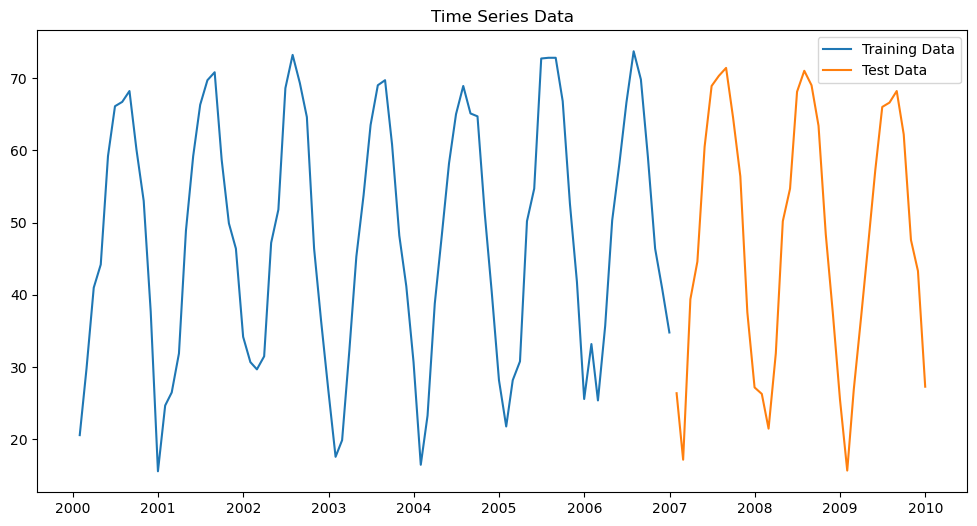

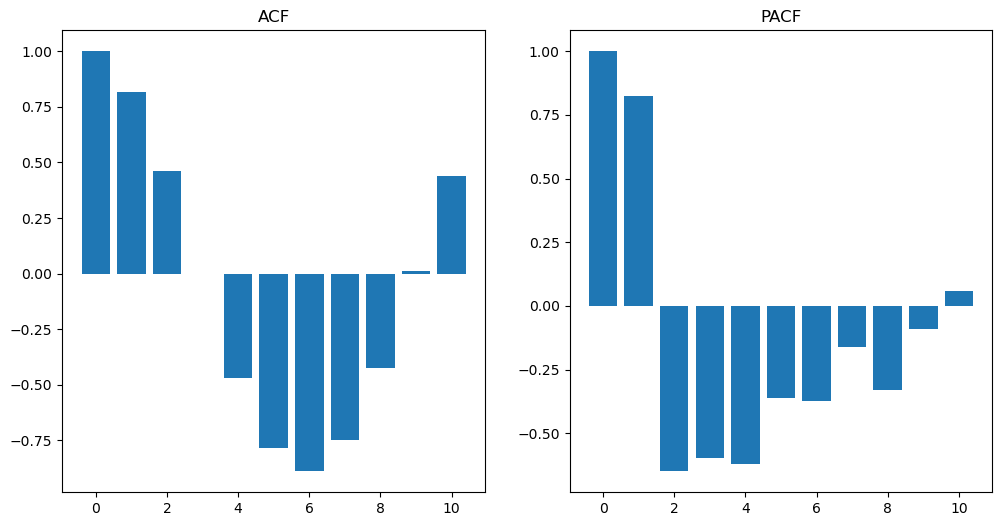

RMSE: 13.123792985172308


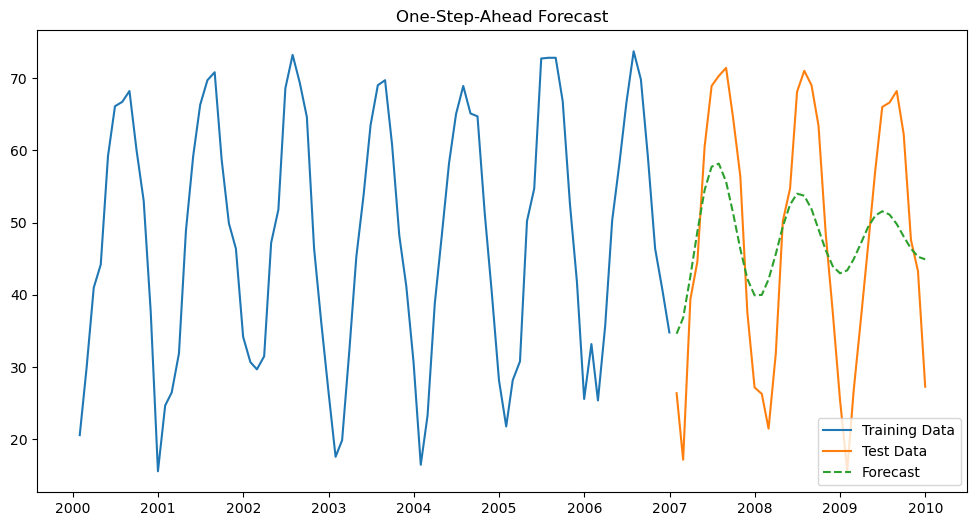

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Data
temperature_data = [
    [20.6, 29.8, 41.0, 44.2, 59.2, 66.1, 66.7, 68.2, 60.1, 53.0, 37.7, 15.6],  # 2000
    [24.7, 26.5, 31.9, 48.9, 59.2, 66.3, 69.7, 70.8, 58.7, 49.9, 46.4, 34.2],  # 2001
    [30.7, 29.7, 31.5, 47.2, 51.8, 68.6, 73.2, 69.3, 64.6, 46.4, 36.4, 26.8],  # 2002
    [17.6, 19.9, 32.3, 45.3, 53.8, 63.5, 69.0, 69.7, 60.8, 48.2, 41.2, 30.7],  # 2003
    [16.5, 23.3, 38.8, 48.2, 58.2, 65.0, 68.9, 65.1, 64.7, 51.3, 40.4, 28.2],  # 2004
    [21.8, 28.2, 30.8, 50.2, 54.7, 72.7, 72.8, 72.8, 66.8, 52.6, 41.8, 25.6],  # 2005
    [33.2, 25.4, 35.7, 50.3, 58.2, 66.6, 73.7, 69.8, 59.1, 46.4, 40.9, 34.8],  # 2006
    [26.4, 17.2, 39.4, 44.6, 60.5, 68.9, 70.3, 71.4, 64.5, 56.4, 37.6, 27.2],  # 2007
    [26.3, 21.5, 31.9, 50.2, 54.7, 68.1, 71.0, 69.0, 63.4, 48.4, 37.6, 25.5],  # 2008
    [15.7, 26.9, 36.8, 46.7, 57.2, 66.0, 66.6, 68.2, 62.2, 47.6, 43.3, 27.3],  # 2009
]

precipitation_data = [
    [0.03, 0.03, 0.04, 0.11, 0.23, 0.07, 0.08, 0.09, 0.21, 0.06, 0.08, 0.03],  # 2000
    [0.02, 0.10, 0.01, 0.09, 0.20, 0.12, 0.04, 0.08, 0.11, 0.18, 0.08, 0.04],  # 2001
    [0.03, 0.05, 0.05, 0.08, 0.11, 0.06, 0.14, 0.06, 0.02, 0.04, 0.05, 0.03],  # 2002
    [0.01, 0.01, 0.05, 0.09, 0.13, 0.06, 0.06, 0.04, 0.07, 0.06, 0.19, 0.05],  # 2003
    [0.03, 0.02, 0.11, 0.02, 0.34, 0.10, 0.12, 0.10, 0.03, 0.06, 0.13, 0.06],  # 2004
    [0.14, 0.07, 0.04, 0.04, 0.06, 0.18, 0.19, 0.02, 0.09, 0.02, 0.15, 0.06],  # 2005
    [0.13, 0.06, 0.09, 0.06, 0.15, 0.05, 0.13, 0.11, 0.10, 0.10, 0.13, 0.10],  # 2006
    [0.07, 0.02, 0.09, 0.11, 0.11, 0.10, 0.02, 0.21, 0.06, 0.11, 0.05, 0.08],  # 2007
    [0.09, 0.09, 0.08, 0.07, 0.04, 0.16, 0.10, 0.04, 0.27, 0.07, 0.06, 0.12],  # 2008
    [0.03, 0.08, 0.10, 0.22, 0.13, 0.15, 0.09, 0.21, 0.02, 0.13, 0.03, 0.05],  # 2009
]

# Convert to flat arrays
temperature = np.array(temperature_data).flatten()
precipitation = np.array(precipitation_data).flatten()

# Choose one dataset to work with (temperature or precipitation)
data = temperature  # Change to precipitation for odd groups
dates = pd.date_range(start="2000-01", periods=len(data), freq="ME")

# Step 1: Split into training and test sets
train, test = data[:len(data) - 36], data[len(data) - 36:]

# Step 2: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(train)], train, label="Training Data")
plt.plot(dates[len(train):], test, label="Test Data")
plt.legend()
plt.title("Time Series Data")
plt.show()

lags = 10

# Step 3: Calculate ACF and PACF
lag_acf = acf(train, nlags=lags)
lag_pacf = pacf(train, nlags=lags)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(len(lag_acf)), lag_acf)
plt.title("ACF")

plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf)
plt.title("PACF")
plt.show()

# Step 4: Fit AR(p) model
p = 3  # Example, determined from ACF/PACF
model = ARIMA(train, order=(p, 0, 0))
model_fit = model.fit()

# Step 5: One-step-ahead forecast
forecast = model_fit.forecast(steps=len(test))

# Step 6: Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(train)], train, label="Training Data")
plt.plot(dates[len(train):], test, label="Test Data")
plt.plot(dates[len(train):], forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("One-Step-Ahead Forecast")
plt.show()


At 9:30, pair your group with even or odd if you are odd or even. Discuss with that group what you learned about your dataset. Discuss with them what differences (or not) you see between these two datasets. 
- Do they contain roughly similar information? 
- Would it make sense to combine them into a VAR($p$) method? 
- How would you use both them to test for causality? For example, do high temperatures cause precipitation? Does precipitation cause cooling? 

Write your findings in a markdown cell. 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [22]:
# Precipitation data for years 2000-2009
precipitation_data = [
    [0.03, 0.03, 0.04, 0.11, 0.23, 0.07, 0.08, 0.09, 0.21, 0.06, 0.08, 0.03],  # 2000
    [0.02, 0.10, 0.01, 0.09, 0.20, 0.12, 0.04, 0.08, 0.11, 0.18, 0.08, 0.04],  # 2001
    [0.03, 0.05, 0.05, 0.08, 0.11, 0.06, 0.14, 0.06, 0.02, 0.04, 0.05, 0.03],  # 2002
    [0.01, 0.01, 0.05, 0.09, 0.13, 0.06, 0.06, 0.04, 0.07, 0.06, 0.19, 0.05],  # 2003
    [0.03, 0.02, 0.11, 0.02, 0.34, 0.10, 0.12, 0.10, 0.03, 0.06, 0.13, 0.06],  # 2004
    [0.14, 0.07, 0.04, 0.04, 0.06, 0.18, 0.19, 0.02, 0.09, 0.02, 0.15, 0.06],  # 2005
    [0.13, 0.06, 0.09, 0.06, 0.15, 0.05, 0.13, 0.11, 0.10, 0.10, 0.13, 0.10],  # 2006
    [0.07, 0.02, 0.09, 0.11, 0.11, 0.10, 0.02, 0.21, 0.06, 0.11, 0.05, 0.08],  # 2007
    [0.09, 0.09, 0.08, 0.07, 0.04, 0.16, 0.10, 0.04, 0.27, 0.07, 0.06, 0.12],  # 2008
    [0.03, 0.08, 0.10, 0.22, 0.13, 0.15, 0.09, 0.21, 0.02, 0.13, 0.03, 0.05],  # 2009
]

# Flatten the data into a one-dimensional array
precipitation = np.array(precipitation_data).flatten()

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Choose the precipitation dataset (since you're in the odd group)
data = precipitation
dates = pd.date_range(start="2000-01", periods=len(data), freq="M")

In [26]:
# Step 1: Split into training and test sets
train_size = len(data) - 36  # Adjust the split as needed
train, test = data[:train_size], data[train_size:]

In [27]:
## test: The last 36 data points used to evaluate the model's forecasting ability.

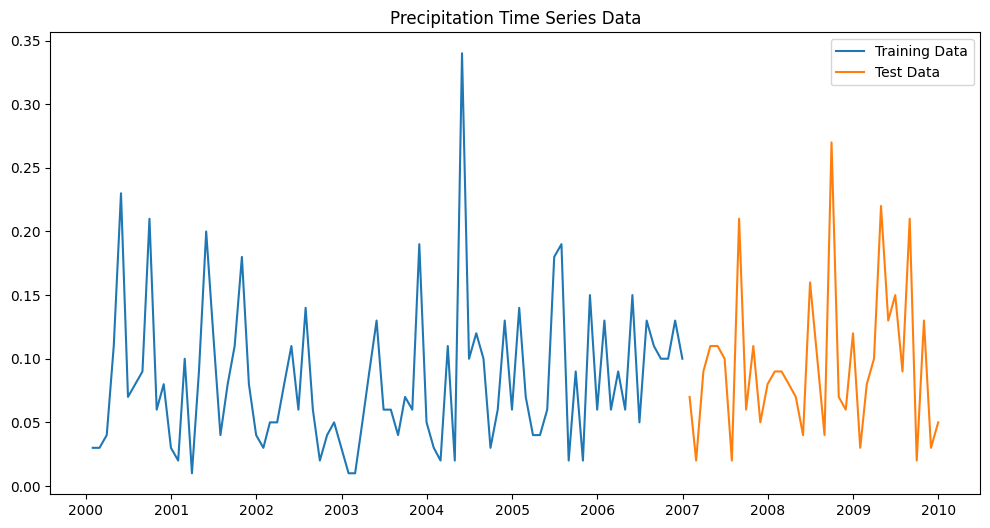

In [28]:
# Step 2: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(train)], train, label="Training Data")
plt.plot(dates[len(train):], test, label="Test Data")
plt.legend()
plt.title("Precipitation Time Series Data")
plt.show()

In [29]:
## ACF and PACF

In [30]:
# Number of lags to consider
lags = 10

# Step 3: Calculate ACF and PACF
lag_acf = acf(train, nlags=lags)
lag_pacf = pacf(train, nlags=lags)

In [31]:
## Autocorrelation Function (ACF): Measures the correlation between the time series and its lagged versions.
### Partial Autocorrelation Function (PACF): Measures the correlation between the time series and its lagged versions, accounting for the values of the time series at all shorter lags.

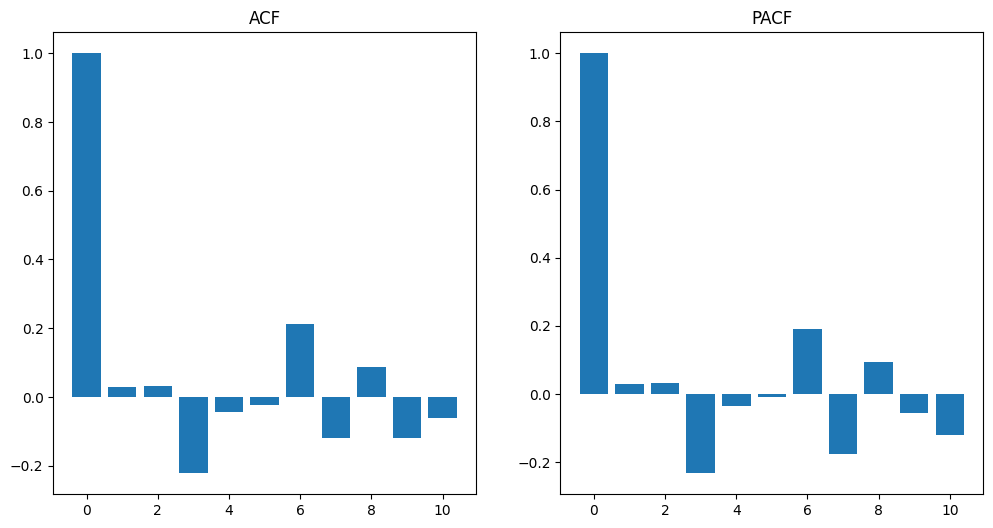

In [32]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(len(lag_acf)), lag_acf)
plt.title("ACF")

plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf)
plt.title("PACF")
plt.show()

In [34]:
## Replace ARIMA with AR(p) CPde

In [35]:
def prepare_ar_data(series, p):
    """
    Prepares the design matrix X and response vector Y for an AR(p) model.
    """
    N = len(series) - p  # Number of observations after accounting for lags
    Y = series[p:]       # Response vector
    X = np.ones((N, p + 1))  # Design matrix with intercept (bias term)
    
    # Fill in the lagged values
    for i in range(1, p + 1):
        X[:, i] = series[p - i:N + p - i]
    
    return X, Y

In [36]:
p = 3  # For example, you might choose p=3 based on the PACF

In [37]:
# Prepare the training data
X_train, Y_train = prepare_ar_data(train, p)

# Estimate the coefficients using OLS
Phi_hat, residuals, rank, s = np.linalg.lstsq(X_train, Y_train, rcond=None)

# Display the estimated coefficients
print("Estimated coefficients:")
print(f"Intercept (phi_0): {Phi_hat[0]}")
for i in range(1, len(Phi_hat)):
    print(f"phi_{i}: {Phi_hat[i]}")

Estimated coefficients:
Intercept (phi_0): 0.10084018913251887
phi_1: 0.01615026838554122
phi_2: 0.02847965640452676
phi_3: -0.22483712260699


In [38]:
def forecast_ar_model(series, Phi_hat, p, steps):
    forecast = []
    last_values = series[-p:].tolist()  # Get the last p observed values

    for _ in range(steps):
        # Compute the next value using the estimated coefficients
        y_next = Phi_hat[0] + sum(Phi_hat[i + 1] * last_values[-i - 1] for i in range(p))
        forecast.append(y_next)
        last_values.append(y_next)  # Append the forecast to the list of last values
    
    return np.array(forecast)


In [39]:
# Number of steps to forecast (length of the test set)
forecast_steps = len(test)

# Generate forecasts
forecast = forecast_ar_model(train, Phi_hat, p, forecast_steps)

In [40]:
# Step 6: Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

RMSE: 0.05943480370202948


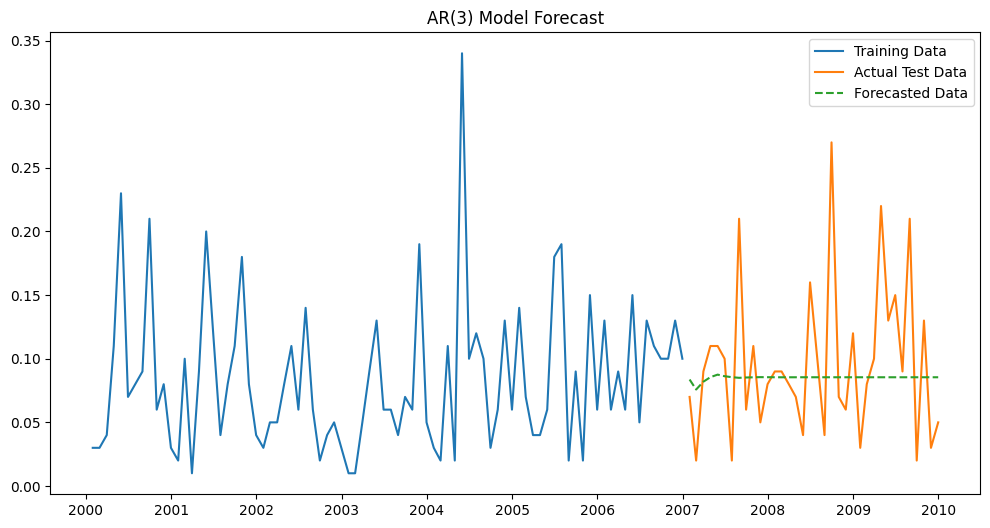

In [41]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(train)], train, label="Training Data")
plt.plot(dates[len(train):], test, label="Actual Test Data")
plt.plot(dates[len(train):], forecast, label="Forecasted Data", linestyle="--")
plt.legend()
plt.title(f"AR({p}) Model Forecast")
plt.show()

## Complete code

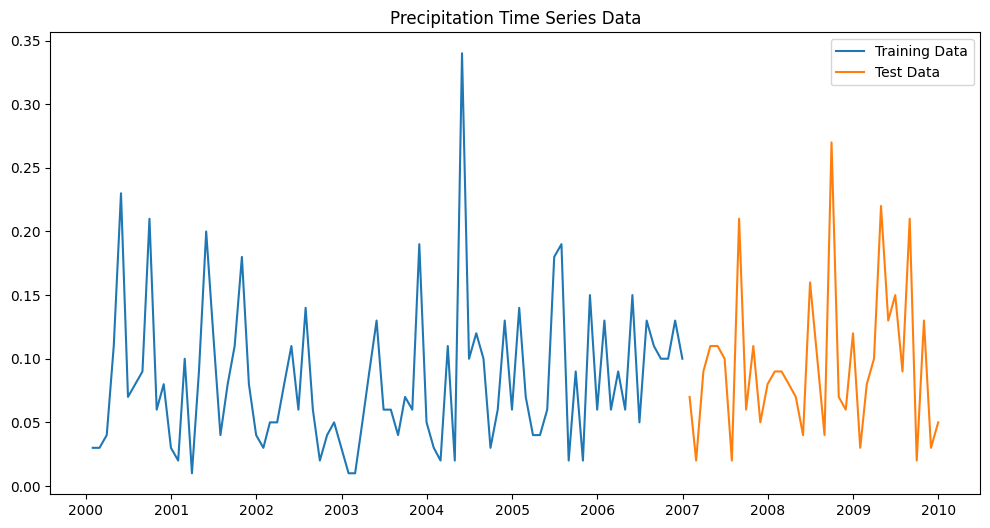

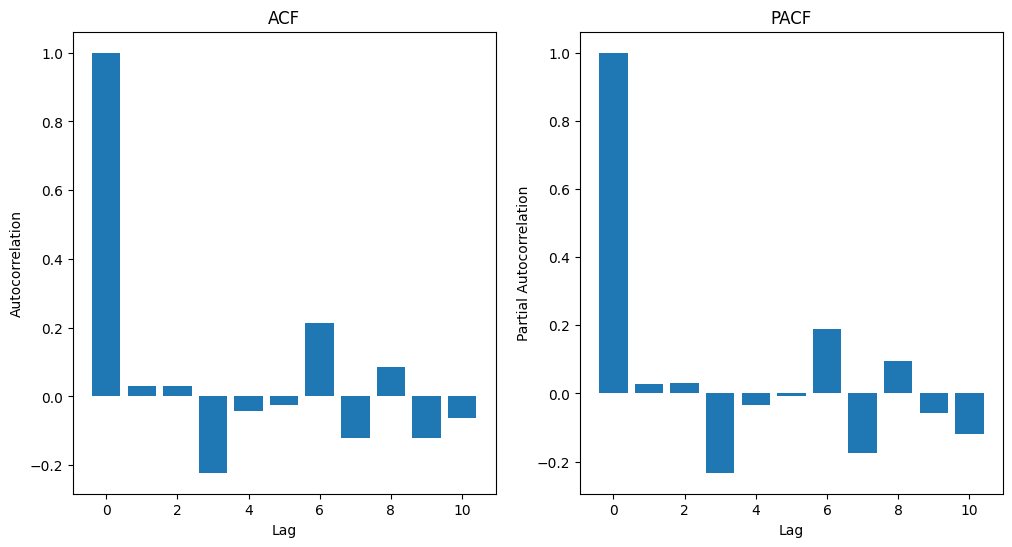

Estimated coefficients:
Intercept (phi_0): 0.10084018913251887
phi_1: 0.01615026838554122
phi_2: 0.02847965640452676
phi_3: -0.22483712260699
RMSE: 0.05943480370202948


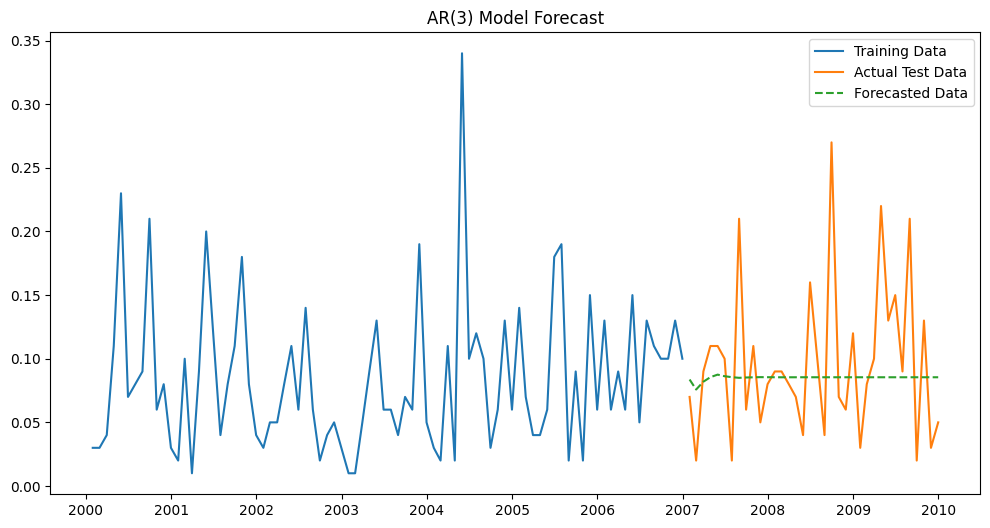

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error

# Precipitation data for the odd group
precipitation_data = [
    [0.03, 0.03, 0.04, 0.11, 0.23, 0.07, 0.08, 0.09, 0.21, 0.06, 0.08, 0.03],  # 2000
    [0.02, 0.10, 0.01, 0.09, 0.20, 0.12, 0.04, 0.08, 0.11, 0.18, 0.08, 0.04],  # 2001
    [0.03, 0.05, 0.05, 0.08, 0.11, 0.06, 0.14, 0.06, 0.02, 0.04, 0.05, 0.03],  # 2002
    [0.01, 0.01, 0.05, 0.09, 0.13, 0.06, 0.06, 0.04, 0.07, 0.06, 0.19, 0.05],  # 2003
    [0.03, 0.02, 0.11, 0.02, 0.34, 0.10, 0.12, 0.10, 0.03, 0.06, 0.13, 0.06],  # 2004
    [0.14, 0.07, 0.04, 0.04, 0.06, 0.18, 0.19, 0.02, 0.09, 0.02, 0.15, 0.06],  # 2005
    [0.13, 0.06, 0.09, 0.06, 0.15, 0.05, 0.13, 0.11, 0.10, 0.10, 0.13, 0.10],  # 2006
    [0.07, 0.02, 0.09, 0.11, 0.11, 0.10, 0.02, 0.21, 0.06, 0.11, 0.05, 0.08],  # 2007
    [0.09, 0.09, 0.08, 0.07, 0.04, 0.16, 0.10, 0.04, 0.27, 0.07, 0.06, 0.12],  # 2008
    [0.03, 0.08, 0.10, 0.22, 0.13, 0.15, 0.09, 0.21, 0.02, 0.13, 0.03, 0.05],  # 2009
]

# Convert to flat array
precipitation = np.array(precipitation_data).flatten()

# Use precipitation data
data = precipitation
dates = pd.date_range(start="2000-01", periods=len(data), freq="M")

# Split data into training and testing sets
train_size = len(data) - 36
train, test = data[:train_size], data[train_size:]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(train)], train, label="Training Data")
plt.plot(dates[len(train):], test, label="Test Data")
plt.legend()
plt.title("Precipitation Time Series Data")
plt.show()

# Calculate ACF and PACF
lags = 10
lag_acf = acf(train, nlags=lags)
lag_pacf = pacf(train, nlags=lags)

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(len(lag_acf)), lag_acf)
plt.title("ACF")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf)
plt.title("PACF")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

# Prepare AR(p) model data
def prepare_ar_data(series, p):
    N = len(series) - p
    Y = series[p:]
    X = np.ones((N, p + 1))
    for i in range(1, p + 1):
        X[:, i] = series[p - i:N + p - i]
    return X, Y

# Choose the order p
p = 3  # Adjust based on PACF plot

# Prepare training data
X_train, Y_train = prepare_ar_data(train, p)

# Estimate coefficients using OLS
Phi_hat, residuals, rank, s = np.linalg.lstsq(X_train, Y_train, rcond=None)

# Display estimated coefficients
print("Estimated coefficients:")
print(f"Intercept (phi_0): {Phi_hat[0]}")
for i in range(1, len(Phi_hat)):
    print(f"phi_{i}: {Phi_hat[i]}")

# Forecasting function
def forecast_ar_model(series, Phi_hat, p, steps):
    forecast = []
    last_values = series[-p:].tolist()
    for _ in range(steps):
        y_next = Phi_hat[0] + sum(Phi_hat[i + 1] * last_values[-i - 1] for i in range(p))
        forecast.append(y_next)
        last_values.append(y_next)
    return np.array(forecast)

# Forecast the test data
forecast_steps = len(test)
forecast = forecast_ar_model(train, Phi_hat, p, forecast_steps)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(dates[:len(train)], train, label="Training Data")
plt.plot(dates[len(train):], test, label="Actual Test Data")
plt.plot(dates[len(train):], forecast, label="Forecasted Data", linestyle="--")
plt.legend()
plt.title(f"AR({p}) Model Forecast")
plt.show()